<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Техническое-задание" data-toc-modified-id="Техническое-задание-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Техническое задание</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Количество-взаимодействий-пользователей-с-карточками-с-разбивкой-по-темам-карточек" data-toc-modified-id="Количество-взаимодействий-пользователей-с-карточками-с-разбивкой-по-темам-карточек-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Количество взаимодействий пользователей с карточками с разбивкой по темам карточек</a></span></li><li><span><a href="#Количество-карточек-от-источников-с-разными-темами" data-toc-modified-id="Количество-карточек-от-источников-с-разными-темами-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Количество карточек от источников с разными темами</a></span></li><li><span><a href="#Cоотношение-тем-карточек-и-тем-источников" data-toc-modified-id="Cоотношение-тем-карточек-и-тем-источников-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Cоотношение тем карточек и тем источников</a></span></li></ul></li><li><span><a href="#Создание-дашборда-и-презентации" data-toc-modified-id="Создание-дашборда-и-презентации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Создание дашборда и презентации</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Описание проекта

Одним из рабочих процессов в сервисе "Яндекс.Дзен" является анализ пользовательского взаимодействия с карточками статей. 

Каждую карточку определяют её тема и источник (у него тоже есть тема). Примеры тем: «Красота и здоровье», «Россия», «Путешествия». Пользователей системы характеризует возрастная категория, например «26-30» или «45+».

Есть три способа взаимодействия пользователей с системой:
- карточка отображена для пользователя (show);
- пользователь кликнул на карточку (click);
- пользователь просмотрел статью карточки (view).

Для менеджеров по анализу контента важно понимать: 
- сколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек;
- как много карточек генерируют источники с разными темами;
- как соотносятся темы карточек и темы источников.

**Целью данной работы** -  является автоматизация процесса анализа пользовательского взаимодействия с карточками статей и создание дашборда для менеджеров.

<font size="2">([к содержанию](#Содержание))</font>

## Техническое задание

По итогам обсуждения с менеджерами и администраторами баз данных, разработано краткое Техническое задание:

- **Бизнес-задача:**  анализ взаимодействия пользователей с карточками Яндекс.Дзен;

- **Насколько часто предполагается пользоваться дашбордом:** не реже, чем раз в неделю;
- **Кто будет основным пользователем дашборда:** менеджеры по анализу контента;
- **Состав данных для дашборда:**
    - история событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
    - разбивка событий по темам источников;
    - таблица соответствия тем источников темам карточек;
- **По каким параметрам данные должны группироваться:**
     - дата и время;
     - тема карточки;
     - тема источника;
     - возрастная группа;
- **Характер данных:**
    - история событий по темам карточек - абсолютные величины с разбивкой по минутам;
    - разбивка событий по темам источников - относительные величины (% событий);
    - соответствия тем источников темам карточек - абсолютные величины;
- **Важность:** все графики имеют равную важность;    
- **Источники данных для дашборда:** cырые данные о событиях взаимодействия пользователей с карточками;  
- **База данных, в которой будут храниться агрегированные данные:** дополнительные агрегированные таблицы в БД;
- **Частота обновления данных:** один раз в сутки, в полночь по UTC;
- **Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):**

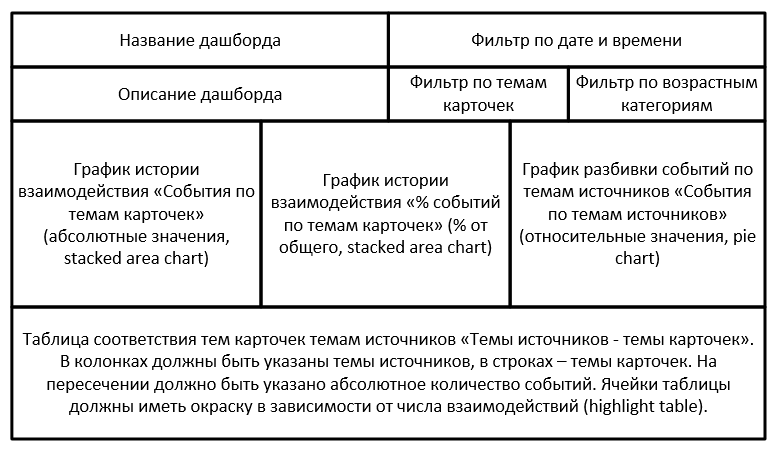


<font size="2">([к содержанию](#Содержание))</font>

## Подготовка данных

Импортируем необходимые библиотеки.

In [29]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2

Создадим подключение к базе данных. 

In [30]:
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

Для импорта данных выполним sql-запрос. 

In [31]:
query='''
select * from dash_visits
'''

In [32]:
data_raw = pd.io.sql.read_sql(query, con = engine)

Полученные исходные данные сохранили в переменную, выборочно проверили результат.  

In [33]:
display(data_raw.head())
display(data_raw.tail())

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


,record_id,item_topic,source_topic,age_segment,dt,visits
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1
30744,1071341,Юмор,Финансы,41-45,2019-09-24 19:00:00,1


 Выгрузим исходные данные из переменной в файл dash_visits.csv.

In [34]:
data_raw.to_csv('dash_visits.csv', sep=';', index=False)

<font size="2">([к содержанию](#Содержание))</font>

## Анализ данных

Проверим общую информацию. 

In [35]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


Датасет состоит из 30745 строк в каждом из 6 столбцов, явные пропуски данных отсутствуют, наименование столбцов в нижнем  регистре, приведены к стандарту snake_case, формат данных менять не требуется. 

Проверим наличие NaN-значений, посчитаем количество, отсортируем по убыванию. Также проверим наличие дубликатов, аномалий.

In [36]:
data_raw.isna().sum().sort_values(ascending = False)

record_id       0
item_topic      0
source_topic    0
age_segment     0
dt              0
visits          0
dtype: int64

In [37]:
print('Количество подозрительных записей:', data_raw.duplicated().sum())

Количество подозрительных записей: 0


Явных дубликтов не выявлено.

In [38]:
print('Общее количество взаимодействий пользователей с карточками:', (data_raw['visits'].sum()))

Общее количество взаимодействий пользователей с карточками: 310207


In [39]:
print('Количество уникальных тем карточек:', len(data_raw['item_topic'].unique()))

Количество уникальных тем карточек: 25


In [40]:
display('Уникальные варианты тем карточек:', data_raw['item_topic'].unique())

'Уникальные варианты тем карточек:'

array(['Деньги', 'Дети', 'Женская психология', 'Женщины', 'Здоровье',
       'Знаменитости', 'Интересные факты', 'Искусство', 'История',
       'Красота', 'Культура', 'Наука', 'Общество', 'Отношения',
       'Подборки', 'Полезные советы', 'Психология', 'Путешествия',
       'Рассказы', 'Россия', 'Семья', 'Скандалы', 'Туризм', 'Шоу', 'Юмор'],
      dtype=object)

In [41]:
print('Количество уникальных тем источников:', len(data_raw['source_topic'].unique()))

Количество уникальных тем источников: 26


In [42]:
display('Уникальные варианты тем источников:', data_raw['source_topic'].unique())

'Уникальные варианты тем источников:'

array(['Авто', 'Деньги', 'Дети', 'Еда', 'Здоровье', 'Знаменитости',
       'Интерьеры', 'Искусство', 'История', 'Кино', 'Музыка', 'Одежда',
       'Полезные советы', 'Политика', 'Психология', 'Путешествия',
       'Ремонт', 'Россия', 'Сад и дача', 'Сделай сам',
       'Семейные отношения', 'Семья', 'Спорт', 'Строительство',
       'Технологии', 'Финансы'], dtype=object)

In [43]:
print('Максимальная дата событий: {}'.format(data_raw['dt'].max()))

Максимальная дата событий: 2019-09-24 19:00:00


In [44]:
print('Минимальная дата событий: {}'.format(data_raw['dt'].min()))

Минимальная дата событий: 2019-09-24 18:28:00


Вывод: 
- данные предоставлены за период с 18:28 по 19:00 2019-09-24;
- общее количество взаимодействий пользователей с карточками - 310 207. 
- количество уникальных тем карточек - 25;
- количество уникальных тем источников карточек - 26.


Явных аномалий не выявлено, данные можно считать пригодным для дальнейшего анализа. 

<font size="2">([к содержанию](#Содержание))</font>

### Количество взаимодействий пользователей с карточками с разбивкой по темам карточек

In [45]:
event_freq_item_topic = (data_raw.pivot_table(index='item_topic',
                                values='visits',
                                aggfunc='sum')
                   .reset_index()
                   .sort_values(by='visits', ascending=False)
                   .reset_index(drop=True)
              )
event_freq_item_topic['% visits'] = (event_freq_item_topic['visits'] / data_raw['visits'].sum() * 100).round(2) 
display(event_freq_item_topic)

,item_topic,visits,% visits
0,Наука,21736,7.01
1,Отношения,20666,6.66
2,Интересные факты,19942,6.43
3,Общество,19640,6.33
4,Подборки,17772,5.73
5,Россия,16966,5.47
6,Полезные советы,15435,4.98
7,История,15389,4.96
8,Семья,11897,3.84
9,Женщины,11499,3.71


ТОП-10 тем карточек по количеству взаимодействий с пользователями:
- Наука	- 7.01%
- Отношения	- 6.66%
- Интересные факты - 6.43%
- Общество - 6.33%
- Подборки - 5.73%
- Россия - 5.47%
- Полезные советы - 4.98%
- История	- 4.96%
- Семья	- 3.84%
- Женщины	- 3.71%

<font size="2">([к содержанию](#Содержание))</font>

### Количество карточек от источников с разными темами

In [46]:
event_freq_source_topic = (data_raw.pivot_table(index='source_topic',
                                values='visits',
                                aggfunc='sum')
                   .reset_index()
                   .sort_values(by='visits', ascending=False)
                   .reset_index(drop=True)
              )
event_freq_source_topic['% visits'] = (event_freq_source_topic['visits'] / data_raw['visits'].sum() * 100).round(2) 
display(event_freq_source_topic)

,source_topic,visits,% visits
0,Семейные отношения,33309,10.74
1,Россия,29831,9.62
2,Полезные советы,27412,8.84
3,Путешествия,24124,7.78
4,Знаменитости,23945,7.72
5,Кино,20084,6.47
6,Дети,15243,4.91
7,История,14628,4.72
8,Семья,13896,4.48
9,Здоровье,12831,4.14


ТОП-10 тем источников карточек по количеству взаимодействий пользователей  с карточками:
- Семейные отношения	- 10.74%
- Россия	- 9.62%
- Полезные советы	- 8.84%
- Путешествия	- 7.78%
- Знаменитости	- 7.72%
- Кино	- 6.47%
- Дети	- 4.91%
- История	- 4.72%
- Семья	- 4.48%
- Здоровье	- 4.14%


<font size="2">([к содержанию](#Содержание))</font>

### Cоотношение тем карточек и тем источников

In [47]:
event_freq_ratio = (data_raw.pivot_table(index=['source_topic', 'item_topic'],
                                values='visits',
                                aggfunc='sum')
                   .reset_index()
                   .sort_values(by='visits', ascending=False)
                   .reset_index(drop=True)
              )

top_source_topic = event_freq_ratio.head(10)
display(top_source_topic)

,source_topic,item_topic,visits
0,Путешествия,Рассказы,4587
1,Россия,Общество,3471
2,Кино,Наука,3279
3,Россия,Россия,2847
4,Полезные советы,Подборки,2795
5,Семейные отношения,Общество,2727
6,Полезные советы,Отношения,2716
7,Путешествия,История,2643
8,Россия,Интересные факты,2567
9,Полезные советы,Здоровье,2335


ТОП-3 темы источников карточек, с наибольшим количеством популярных тем карточек:
- Россия:
   - Общество;
   - Россия;
   - Интересные факты;
- Полезные советы:
   - Подборки;
   - Отношения;
   - Здоровье;
- Путешествия:
   - Рассказы;
   - История.
   
<font size="2">([к содержанию](#Содержание))</font>

## Создание дашборда и презентации

Для автоматизации процесса анализа пользовательского взаимодействия с карточками статей создан [дашборд](https://public.tableau.com/app/profile/roman.suhanov/viz/Dashboard_Yandex_Dzen_16516697384480/Dashboard12?publish=yes) 

Также подготовлена [презентация](https://disk.yandex.ru/i/4JIgZxms-FIwUg) 

## Чек-лист готовности проекта

- [x] необходимые библиотеки импортированы;
- [x] данные загружены и подготовлены к анализу;
- [x] исследовано сколько происходит взаимодействий пользователей с карточками с разбивкой по темам карточек;
- [x] исследовано как много карточек генерируют источники с разными темами;
- [x] исследовано как соотносятся темы карточек и темы источников;
- [x] сделаны выводы;
- [x] подготовлен дашборд; 
- [x] подготовлена презентация.

<font size="2">([к содержанию](#Содержание))</font>